In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.getcwd()


'/Users/ar/Documents/FAnalytics/projects/notebooks'

In [4]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("/Users/ar/Documents/FAnalytics/projects/data/soccer-spi/spi_matches_latest.csv")

In [5]:
df["league"].unique()

array(['Chinese Super League', 'Japanese J League', 'NWSL Challenge Cup',
       'Swedish Allsvenskan', 'Norwegian Tippeligaen',
       'Brasileiro Série A', 'Mexican Primera Division Torneo Apertura',
       'Russian Premier Liga', 'Danish SAS-Ligaen',
       'German 2. Bundesliga', 'Swiss Raiffeisen Super League',
       'Austrian T-Mobile Bundesliga', 'Belgian Jupiler League',
       'English League Championship', 'Scottish Premiership',
       'French Ligue 2', 'English League Two', 'English League One',
       'South African ABSA Premier League', 'Dutch Eredivisie',
       'Turkish Turkcell Super Lig', 'German Bundesliga',
       'French Ligue 1', 'Barclays Premier League', 'Portuguese Liga',
       'Italy Serie B', 'Spanish Primera Division',
       'Spanish Segunda Division', 'Italy Serie A', 'Greek Super League',
       'UEFA Champions League', 'UEFA Europa League',
       'UEFA Europa Conference League', "FA Women's Super League",
       'Australian A-League', 'Mexican Primera

In [6]:
df = df[(df["league"] == "Spanish Primera Division") & (df["season"] == 2022)]

In [9]:
df["date"] = pd.to_datetime(df["date"])
df.reset_index(inplace = True)
df

,index,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,1374,2022,2022-08-12,1869,Spanish Primera Division,Osasuna,Sevilla FC,63.69,71.45,0.3443,0.3590,0.2968,1.17,1.20,26.0,38.3,2.0,1.0,1.44,1.09,0.70,1.12,2.1,1.05
1,1443,2022,2022-08-13,1869,Spanish Primera Division,Celta Vigo,Espanyol,69.06,59.72,0.5358,0.1994,0.2648,1.62,0.88,32.6,33.5,2.0,2.0,0.40,1.12,1.05,0.47,2.1,2.10
2,1459,2022,2022-08-13,1869,Spanish Primera Division,Real Valladolid,Villarreal,59.80,77.14,0.2456,0.5033,0.2510,1.16,1.76,34.5,50.8,0.0,3.0,0.91,1.60,0.78,1.67,0.0,2.35
3,1485,2022,2022-08-13,1869,Spanish Primera Division,Barcelona,Rayo Vallecano,84.44,63.56,0.7269,0.0906,0.1825,2.26,0.65,53.7,23.5,0.0,0.0,1.47,0.81,2.46,0.64,0.0,0.00
4,1538,2022,2022-08-14,1869,Spanish Primera Division,Cadiz,Real Sociedad,62.62,74.77,0.2948,0.4245,0.2808,1.14,1.42,27.6,47.5,0.0,1.0,0.27,2.09,0.79,1.75,0.0,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,10658,2022,2023-06-04,1869,Spanish Primera Division,Real Valladolid,Getafe,57.04,63.56,0.3779,0.3006,0.3215,1.10,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,10659,2022,2023-06-04,1869,Spanish Primera Division,Espanyol,Almeria,61.73,57.28,0.4774,0.2623,0.2604,1.65,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,10660,2022,2023-06-04,1869,Spanish Primera Division,Real Betis,Valencia,69.72,67.30,0.4668,0.2603,0.2729,1.53,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,10661,2022,2023-06-04,1869,Spanish Primera Division,Real Madrid,Athletic Bilbao,86.01,74.99,0.6087,0.1619,0.2294,1.94,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df

,index,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,1374,2022,2022-08-12,1869,Spanish Primera Division,Osasuna,Sevilla FC,63.69,71.45,0.3443,0.3590,0.2968,1.17,1.20,26.0,38.3,2.0,1.0,1.44,1.09,0.70,1.12,2.1,1.05
1,1443,2022,2022-08-13,1869,Spanish Primera Division,Celta Vigo,Espanyol,69.06,59.72,0.5358,0.1994,0.2648,1.62,0.88,32.6,33.5,2.0,2.0,0.40,1.12,1.05,0.47,2.1,2.10
2,1459,2022,2022-08-13,1869,Spanish Primera Division,Real Valladolid,Villarreal,59.80,77.14,0.2456,0.5033,0.2510,1.16,1.76,34.5,50.8,0.0,3.0,0.91,1.60,0.78,1.67,0.0,2.35
3,1485,2022,2022-08-13,1869,Spanish Primera Division,Barcelona,Rayo Vallecano,84.44,63.56,0.7269,0.0906,0.1825,2.26,0.65,53.7,23.5,0.0,0.0,1.47,0.81,2.46,0.64,0.0,0.00
4,1538,2022,2022-08-14,1869,Spanish Primera Division,Cadiz,Real Sociedad,62.62,74.77,0.2948,0.4245,0.2808,1.14,1.42,27.6,47.5,0.0,1.0,0.27,2.09,0.79,1.75,0.0,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,10658,2022,2023-06-04,1869,Spanish Primera Division,Real Valladolid,Getafe,57.04,63.56,0.3779,0.3006,0.3215,1.10,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,10659,2022,2023-06-04,1869,Spanish Primera Division,Espanyol,Almeria,61.73,57.28,0.4774,0.2623,0.2604,1.65,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,10660,2022,2023-06-04,1869,Spanish Primera Division,Real Betis,Valencia,69.72,67.30,0.4668,0.2603,0.2729,1.53,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,10661,2022,2023-06-04,1869,Spanish Primera Division,Real Madrid,Athletic Bilbao,86.01,74.99,0.6087,0.1619,0.2294,1.94,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df["home_win"] = [1 if x > y else 0 for x,y in zip(df["score1"], df["score2"])]

df["tie"] = [1 if x == y else 0 for x,y in zip(df["score1"], df["score2"])]

df["away_win"] = [1 if x < y else 0 for x,y in zip(df["score1"], df["score2"])]

,index,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,home_win,tie,away_win
0,1374,2022,2022-08-12,1869,Spanish Primera Division,Osasuna,Sevilla FC,63.69,71.45,0.3443,0.3590,0.2968,1.17,1.20,26.0,38.3,2.0,1.0,1.44,1.09,0.70,1.12,2.1,1.05,1,0,0
1,1443,2022,2022-08-13,1869,Spanish Primera Division,Celta Vigo,Espanyol,69.06,59.72,0.5358,0.1994,0.2648,1.62,0.88,32.6,33.5,2.0,2.0,0.40,1.12,1.05,0.47,2.1,2.10,0,1,0
2,1459,2022,2022-08-13,1869,Spanish Primera Division,Real Valladolid,Villarreal,59.80,77.14,0.2456,0.5033,0.2510,1.16,1.76,34.5,50.8,0.0,3.0,0.91,1.60,0.78,1.67,0.0,2.35,0,0,1
3,1485,2022,2022-08-13,1869,Spanish Primera Division,Barcelona,Rayo Vallecano,84.44,63.56,0.7269,0.0906,0.1825,2.26,0.65,53.7,23.5,0.0,0.0,1.47,0.81,2.46,0.64,0.0,0.00,0,1,0
4,1538,2022,2022-08-14,1869,Spanish Primera Division,Cadiz,Real Sociedad,62.62,74.77,0.2948,0.4245,0.2808,1.14,1.42,27.6,47.5,0.0,1.0,0.27,2.09,0.79,1.75,0.0,1.05,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,10658,2022,2023-06-04,1869,Spanish Primera Division,Real Valladolid,Getafe,57.04,63.56,0.3779,0.3006,0.3215,1.10,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
376,10659,2022,2023-06-04,1869,Spanish Primera Division,Espanyol,Almeria,61.73,57.28,0.4774,0.2623,0.2604,1.65,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
377,10660,2022,2023-06-04,1869,Spanish Primera Division,Real Betis,Valencia,69.72,67.30,0.4668,0.2603,0.2729,1.53,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
378,10661,2022,2023-06-04,1869,Spanish Primera Division,Real Madrid,Athletic Bilbao,86.01,74.99,0.6087,0.1619,0.2294,1.94,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [17]:
df = df.assign(
    brier_score = lambda x:
    1/3*(
        (x.prob1 - x.home_win)**2 +
        (x.probtie - x.tie)**2 +
        (x.prob2 - x.away_win)**2
    )
)


In [28]:
teams = df[["team1"]].drop_duplicates()

plot_df = pd.DataFrame()

In [29]:
for team in teams["team1"]:
    aux_df = df[(df["team1"] == team) | (df["team2"] == team)].copy()
    # compute cumulative average
    cum_mean = (
        aux_df["brier_score"].expanding().mean()
    )

    new_df = pd.DataFrame()
    new_df["cum_mean"] = cum_mean
    new_df["team_id"] = team

    plot_df = plot_df.append(new_df)

/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_52856/1649686160.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_df)
/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_52856/1649686160.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_df)
/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_52856/1649686160.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_df)
/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_52856/1649686160.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_

In [30]:
plot_df

,cum_mean,team_id
0,0.215638,Osasuna
12,0.181456,Osasuna
21,0.156896,Osasuna
35,0.154867,Osasuna
49,0.167558,Osasuna
...,...,...
334,0.177098,Villarreal
340,0.175350,Villarreal
352,0.174224,Villarreal
366,0.172668,Villarreal


In [33]:
plot_df[plot_df["team_id"] == "Barcelona"]

,cum_mean,team_id
3,0.401633,Barcelona
17,0.291372,Barcelona
26,0.203076,Barcelona
34,0.181786,Barcelona
43,0.154562,Barcelona
52,0.130941,Barcelona
64,0.118442,Barcelona
78,0.108287,Barcelona
86,0.112611,Barcelona
99,0.110027,Barcelona


In [35]:
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
#from highlight_text import ax_text, fig_text

In [52]:
def plot_team_brier_score(ax, team_id, data, label_y = True, label_x = True):
    '''
    Plots the cumulative Brier Score for a given side
    with all the other teams in the backgorund in a lighter
    color.
    '''

    df = data.copy()

    team_df = df[df["team_id"] == team_id].reset_index(drop = True)
    #color = team_df["color"].iloc[0]

    ax.plot(
        team_df.index,
        team_df["cum_mean"],
        #color = color,
        lw = 1.75,
        zorder = 3,
        marker = "o",
        markevery = [-1],
        markeredgecolor = "#EFE9E6"
    )

    ax.annotate(
        xy = (team_df.index[-1], team_df["cum_mean"].iloc[-1]),
        xytext = (15, 0),
        text = f'{team_df["cum_mean"].iloc[-1]:.3f}',
        textcoords = "offset points",
        ha = "center",
        va = "center",
        #color = color,
        weight = "bold",
        size = 8
    )

    for x in df["team_id"].unique():
        if x == team_id:
            continue
        aux_df = df[df["team_id"] == x].reset_index(drop = True)

        ax.plot(
            aux_df.index,
            aux_df["cum_mean"],
            color = "gray",
            alpha = 0.15,
            lw = 1.25,
            zorder = 2
        )

    ax.grid(ls = ":", color = "lightgrey")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

    if label_y:
        ax.set_ylabel("Brier score")
    else:
        ax.set_yticklabels([])
    if label_x:
        ax.set_xlabel("Match day")
    else:
        ax.set_xticklabels([])

    return ax


order_teams = (
    plot_df.groupby(["team_id"])
    ["cum_mean"]
    .last()
    .reset_index()
    .sort_values(by = "cum_mean")
)

fig = plt.figure(figsize=(20, 40), dpi = 200)
nrows = 10
ncols = 4
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig,
    height_ratios = [(1/nrows)*2. if x % 2 != 0 else (1/nrows)/2. for x in range(nrows)], hspace = 0
)


<Figure size 4000x8000 with 0 Axes>

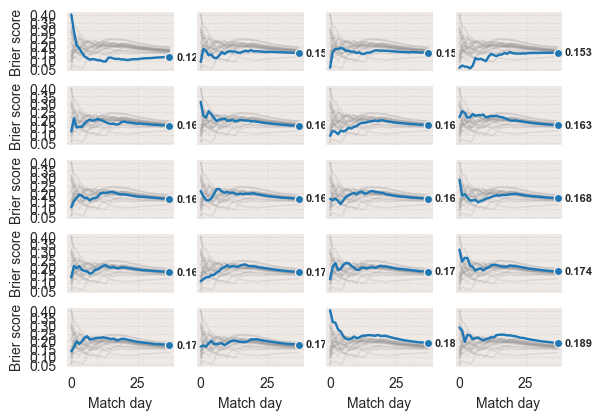

In [53]:
plot_counter = 0
logo_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],
                facecolor = "#EFE9E6"
            )

            teamId = order_teams["team_id"].iloc[plot_counter]

            if col == 0:
                labels_y = True
            else:
                labels_y = False

            if row == nrows - 1:
                labels_x = True
            else:
                labels_x = False

            plot_team_brier_score(ax, teamId, plot_df, labels_y, labels_x)

            plot_counter += 1

In [54]:
import numpy as np

# Outcome should be a binary list of the ordinal outcome. [0, 1, 0] for exmaple.
# Probs should be a list of probabilities. [0.79, 0.09, 0.12] for example.
# Outcome and Probs must be provided with the same order as probabilities.

def rps(probs, outcome):
    cum_probs = np.cumsum(probs)
    cum_outcomes = np.cumsum(outcome)

    print(cum_outcomes)
    print(cum_probs)
    sum_rps = 0
    for i in range(len(outcome)):
        sum_rps+= (cum_probs[i] - cum_outcomes[i])**2

    return sum_rps/(len(outcome)-1)


In [69]:
rps([0.2, 0.5, 0.1], [0,1,1])

[0 1 2]
[0.2 0.7 0.8]


0.7850000000000003

In [61]:
rps([0.2, 0.5, 0.1], [1,0,0])

[1 1 1]
[0.2 0.7 0.8]


0.3850000000000001

In [58]:
rps([0.2, 0.5, 0.1], [0,1,0])

[0 1 1]
[0.2 0.7 0.8]


0.08500000000000003

In [70]:
def rps(predictions, observed):
    """Vectorized version of Ranked Probability Score.
    A lower value is a better score.
    From: Colin Catlin, https://syllepsis.live/2022/01/22/ranked-probability-score-in-python/

    Args:
        predictions (pd.DataFrame): each column is an outcome category
            with values as the 0 to 1 probability of that category
        observed (pd.DataFrame): each column is an outcome category
            with values of 0 OR 1 with 1 being that category occurred
    """
    assert (
        predictions.shape == observed.shape
    ), "prediction and observed array shapes must match"
    ncat = predictions.shape[1] - 1
    return (
        np.sum(
            (np.cumsum(predictions, axis=1) - np.cumsum(observed, axis=1)) ** 2, axis=1
        ) / ncat
    )


"""
Sample data is of soccer/football matches,
5 matches, with 2 different models predicting (with 'a' the better model)
3 Categories
Where H = home team wins, D = draw, A = away wins

ORDER MATTERS (of H, D, and A), which is the whole point of this metric.
"""
predictions_df = pd.DataFrame({
    'H': [1, 0.9, 0.8, 0.5, 0.35, 0.6, 0.6, 0.6, 0.5, 0.55],
    'D': [0, 0.1, 0.1, 0.25, 0.3, 0.3, 0.3, 0.1, 0.45, 0.1],
    'A': [0, 0, 0.1, 0.25, 0.35, 0.1, 0.1, 0.3, 0.05, 0.35],
    "model": np.tile(["a", "b"], 5),
    "match": np.repeat(np.arange(1, 6), 2),
    "outcome": np.repeat(["H", "H", "D", "H", "H"], 2),
})
expected_result = [0, 0.005, 0.025, 0.15625, 0.1225, 0.185, 0.085, 0.125, 0.12625, 0.1625]
predictions = predictions_df[["H", "D", "A"]]
observed = pd.get_dummies(predictions_df["outcome"]).reindex(
    columns=predictions.columns, fill_value=0
)
rps_result = rps(predictions, observed).round(5)
print(f"do results match expected: {all(expected_result == rps_result)}")

print(rps_result)

do results match expected: True
0    0.00000
1    0.00500
2    0.02500
3    0.15625
4    0.12250
5    0.18500
6    0.08500
7    0.12500
8    0.12625
9    0.16250
dtype: float64


In [71]:
predictions_df

,H,D,A,model,match,outcome
0,1.00,0.00,0.00,a,1,H
1,0.90,0.10,0.00,b,1,H
2,0.80,0.10,0.10,a,2,H
3,0.50,0.25,0.25,b,2,H
4,0.35,0.30,0.35,a,3,D
5,0.60,0.30,0.10,b,3,D
6,0.60,0.30,0.10,a,4,H
7,0.60,0.10,0.30,b,4,H
8,0.50,0.45,0.05,a,5,H
9,0.55,0.10,0.35,b,5,H
